In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

%matplotlib inline

In [2]:
files = glob.glob("Talinay2015/*.dat")

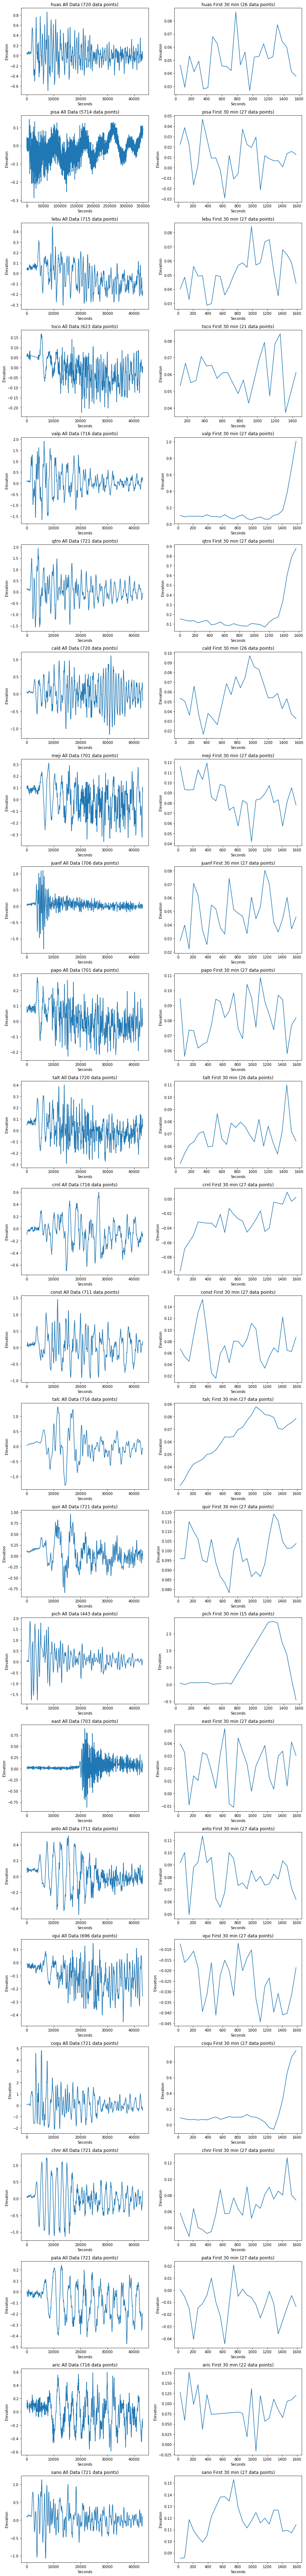

In [3]:
fig,axes = plt.subplots(len(files),2,figsize=(12,100))
names = []
datasets = {}
for i,file in enumerate(files):
    name = os.path.basename(file).replace(".dat","")
    df = pd.read_csv(file, sep="\s+", names=["time","elevation"]).sort_values("time")
    df = df[df.time > 0]
    datasets[name] = df
    names.append(name)
    
    axes[i,0].plot(df.time,df.elevation)
    axes[i,0].set_title(name+" All Data ({} data points)".format(len(df)))
    axes[i,0].set_xlabel("Seconds")
    axes[i,0].set_ylabel("Elevation")
    
    df = df[df.time < 1600 ]    
    axes[i,1].plot(df.time,df.elevation)
    axes[i,1].set_title(name+" First 30 min ({} data points)".format(len(df)))
    axes[i,1].set_xlabel("Seconds")
    axes[i,1].set_ylabel("Elevation")
plt.tight_layout()
plt.show()

In [4]:
df = pd.read_excel("Talinay2015/SIPAT_Localidades_costa_v3_paraLeo.xlsx")

In [5]:
rows = []
for name in names:
    row = df[df["NOMBRE MAREOGRAFO ASOCIADO"] == name]
    if len(row)>0:
        rows.append(row.values[0])

filtered = pd.DataFrame(rows,columns=df.columns)

In [6]:
filtered

,LOCALIDAD NOMBRE,ID LOCALIDAD NUEVA,LOCALIDAD LONGITUD,LOCALIDAD LATITUD,COMUNA ID CENSO,COMUNA NOMBRE,PROVINCIA NOMBRE,PROVINCIA ID,BLOQUE ID,BLOQUE NOMBRE,REGION ID,REGION NOMBRE,PAIS ID,PAIS,MAREOGRAFO ID ASOCIADO,NOMBRE MAREOGRAFO ASOCIADO,LOCALIDAD CATEGORIA
0,Huasco,10012,-71.223832,-28.460820,3304,Huasco,Huasco,33,6,Atacama Sur,3,Atacama,1,Chile,12.0,huas,Mareografo
1,Pisagua,10002,-70.215982,-19.596890,1404,Huara,Tamarugal,14,2,Tarapaca,1,Tarapaca,1,Chile,2.0,pisa,Mareografo
2,Lebu,10022,-73.663980,-37.594225,8201,Lebu,Arauco,82,11,Biobio,8,Biobio,1,Chile,22.0,lebu,Mareografo
3,Tocopilla,10005,-70.211653,-22.093757,2301,Tocopilla,Tocopilla,23,3,Antofagasta Norte,2,Antofagasta,1,Chile,5.0,toco,Mareografo
4,Valparaiso,10016,-71.625939,-33.027308,5101,Valparaiso,Valparaiso,51,8,Valparaiso,5,Valparaiso,1,Chile,16.0,valp,Mareografo
5,Quintero,10015,-71.525278,-32.775556,5107,Quintero,Valparaiso,51,8,Valparaiso,5,Valparaiso,1,Chile,15.0,qtro,Mareografo
6,Caldera,10011,-70.824719,-27.064605,3102,Caldera,Copiapo,31,5,Atacama Norte,3,Atacama,1,Chile,11.0,cald,Mareografo
7,Mejillones,10006,-70.450830,-23.097500,2102,Mejillones,Antofagasta,21,3,Antofagasta Norte,2,Antofagasta,1,Chile,6.0,meji,Mareografo
8,Paposo,10008,-70.468728,-25.008982,2104,Taltal,Antofagasta,21,4,Antofagasta Sur,2,Antofagasta,1,Chile,8.0,papo,Mareografo
9,Taltal,10009,-70.491683,-25.408105,2104,Taltal,Antofagasta,21,4,Antofagasta Sur,2,Antofagasta,1,Chile,9.0,talt,Mareografo


In [40]:
# fps = filtered["MAREOGRAFO ID ASOCIADO"].values.astype(int)

In [41]:
# max_amps = []
# relevant_data = []

# for fp in fps:
#     files = glob.glob("talinay_nrt/{}_*".format(fp))
#     for file in files:
        
#         filename = os.path.basename(file)
#         scenario = filename.replace(".csv","").split("_")[1]
#         df =pd.read_csv(file, index_col=0)
#         if len(df) > 0:
#             df_inv = df#df[df.tstep < 1800]
#             if len(df_inv) > 0:
#                 x = np.arange(5401)
                
#                 y = np.zeros((5401,len(df_inv.vfp.unique())))
#                 map_y = dict([(vfp,i) for (vfp,i) in zip(df_inv.vfp.unique(),np.arange(len(df_inv.vfp.unique())))])
#                 for i,row in df_inv.iterrows():
#                     y[int(row.tstep),map_y[row.vfp]] = row.amplitude
    
# #                 print("Mean",df_inv.amplitude.abs().mean(),"STD", df_inv.amplitude.abs().std(),"Min", df_inv.amplitude.min(), 
#                 print("min tstep:",df_inv.tstep.min(), "fp:",fp,"scenario:",scenario,"Max", np.abs(df_inv.amplitude.max()))
#                 relevant_data.append({"min_tstep":df_inv.tstep.min(), "fp":fp,"scenario:":scenario,"max": np.abs(df_inv.amplitude.max())})
#                 max_amps.append(np.abs(df_inv.amplitude.max()))
#                 plt.figure(figsize=(10,4))
#                 plt.title("FP:{} Scenario:{}".format(fp,scenario))
#                 plt.plot(x,y)
# #                 plt.ylim((-0.02,0.02))
#                 plt.show()

# max_amps = np.array(max_amps)

# Raw data

In [43]:
files = glob.glob("talinay_raw_nrt/*")

In [44]:
df_fp = pd.read_excel("Talinay2015/SIPAT_Localidades_costa_v3_paraLeo.xlsx")

In [46]:
import geopy.distance

In [47]:
points = [(row["LOCALIDAD LATITUD"],row["LOCALIDAD LONGITUD"]) for i,row in df_fp[df_fp["MAREOGRAFO ID ASOCIADO"] < 46].iterrows()]
points = pd.DataFrame(points,columns=["lat","long"])

In [48]:
hypo = (-31.573000, -71.674000)

In [49]:
scenario = (-31.3, -71.65)

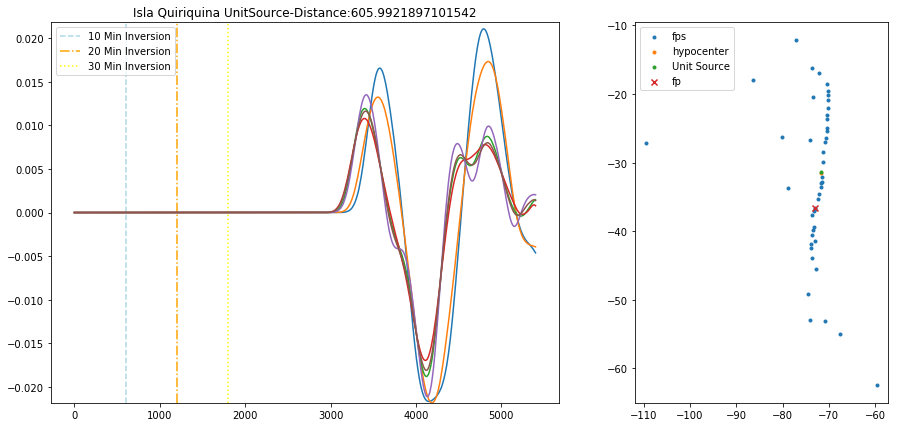

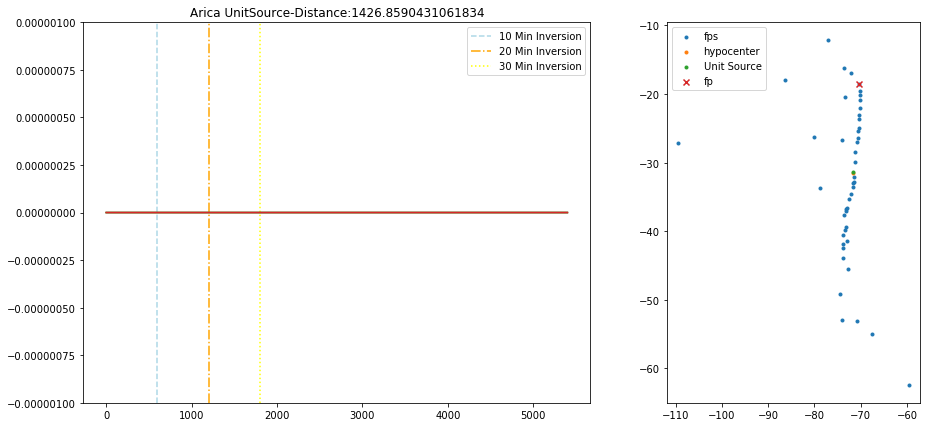

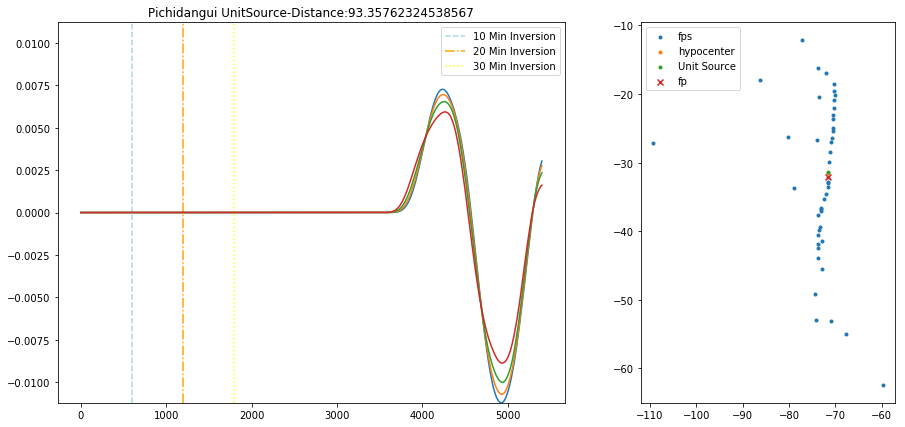

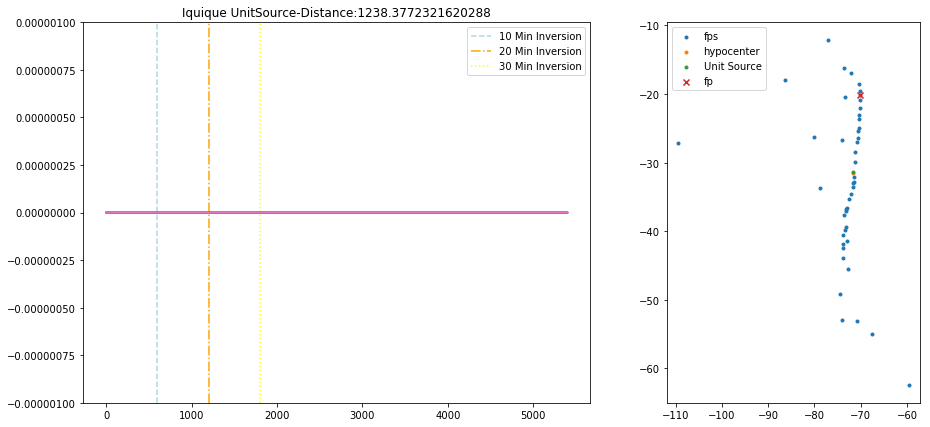

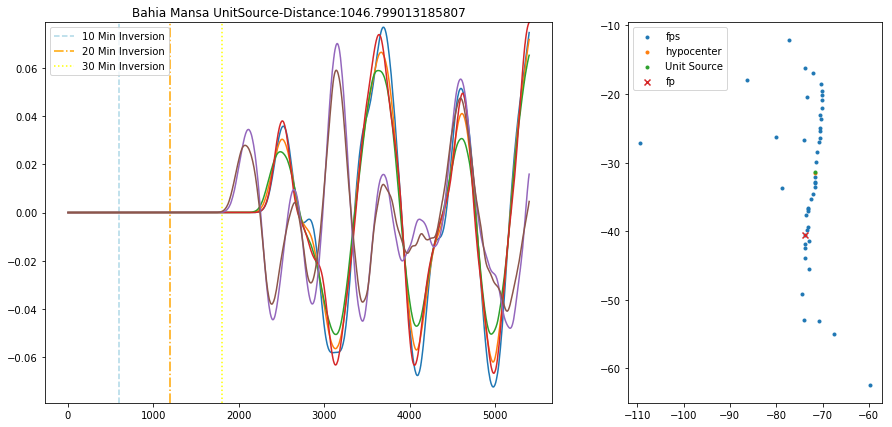

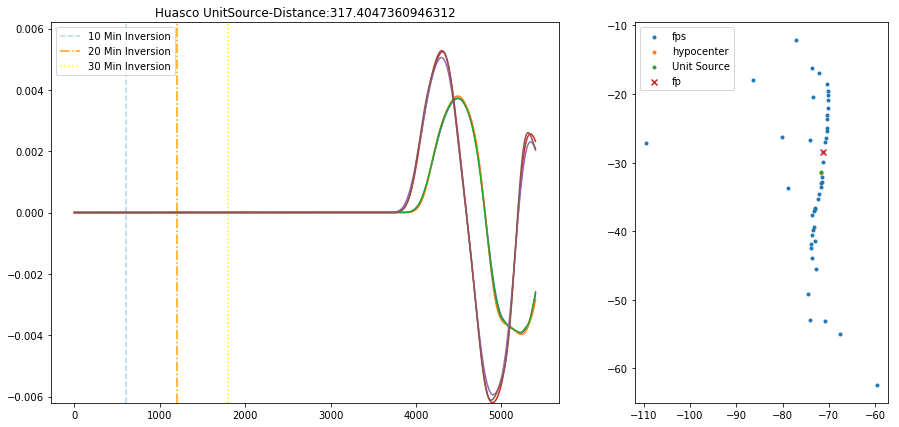

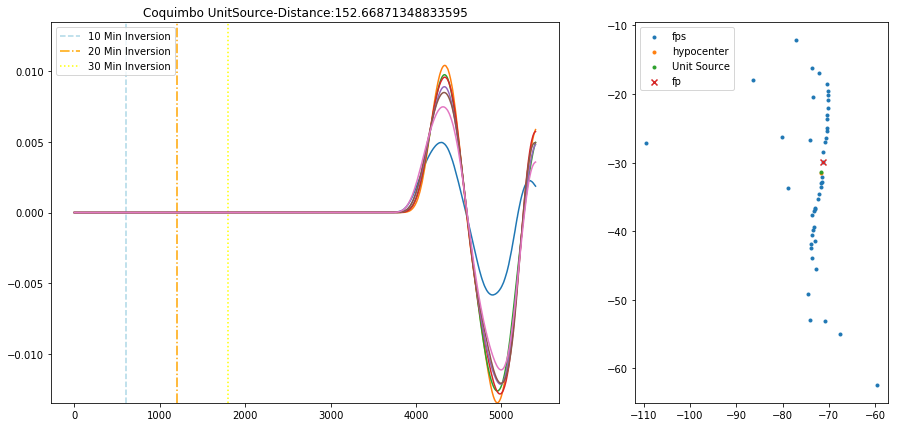

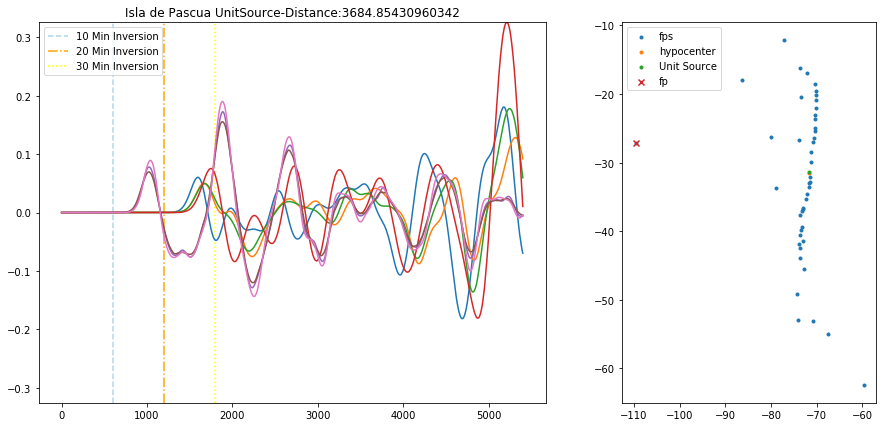

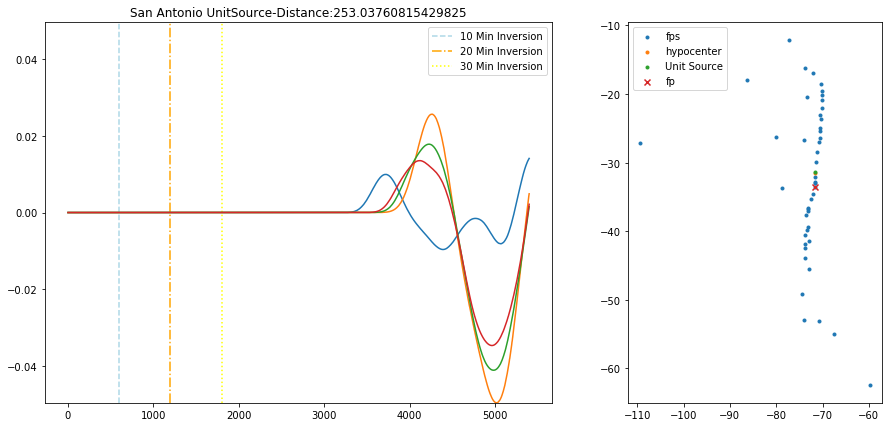

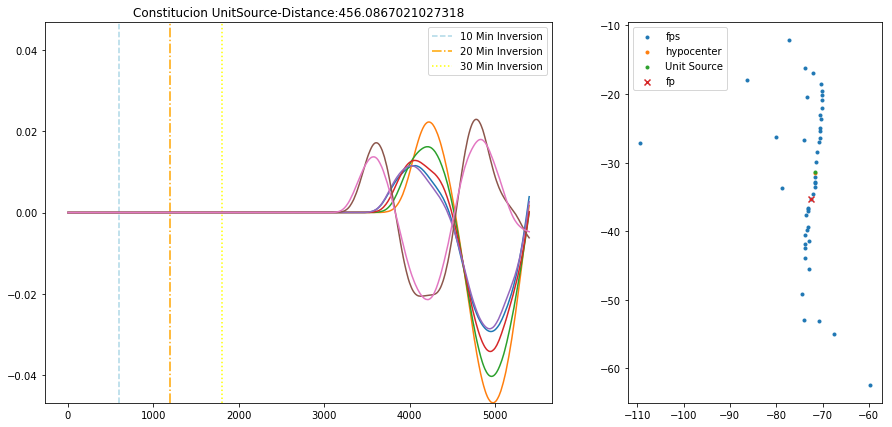

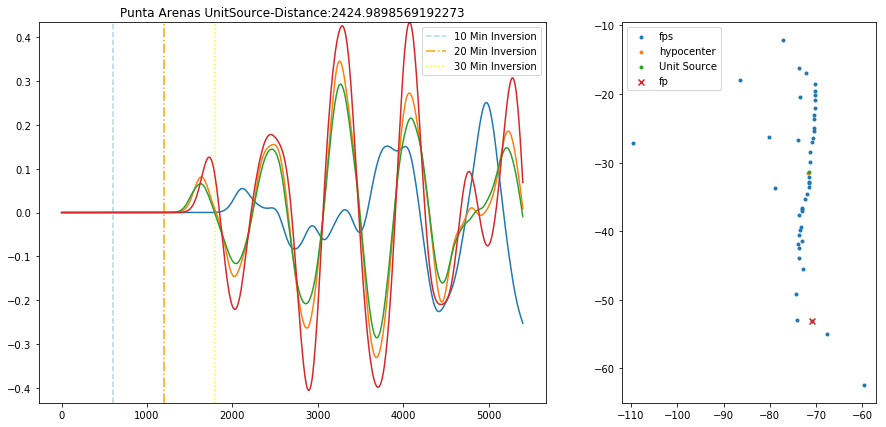

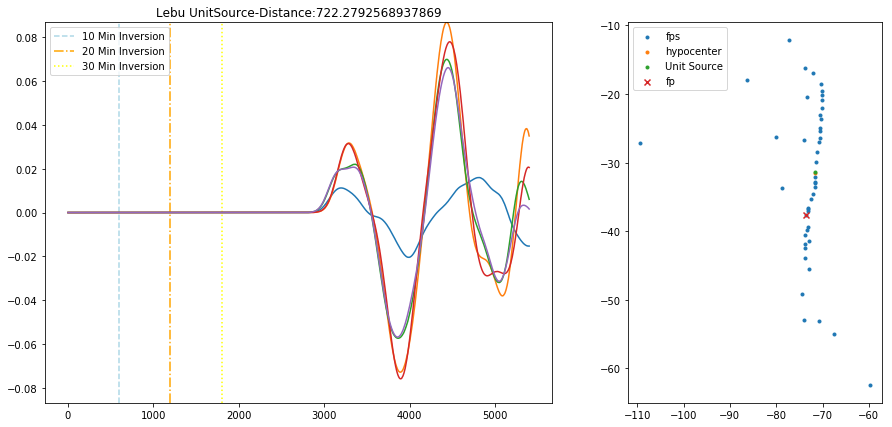

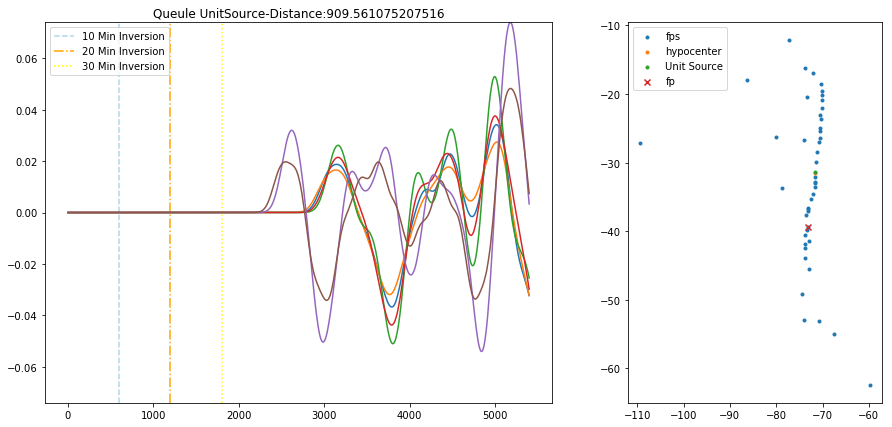

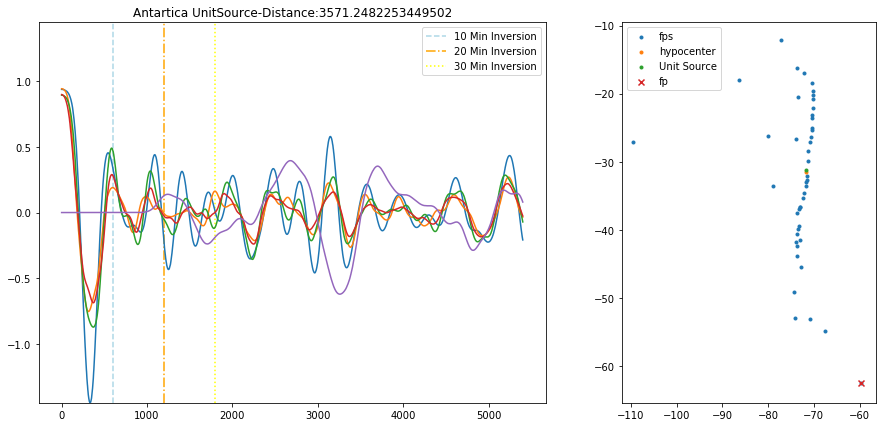

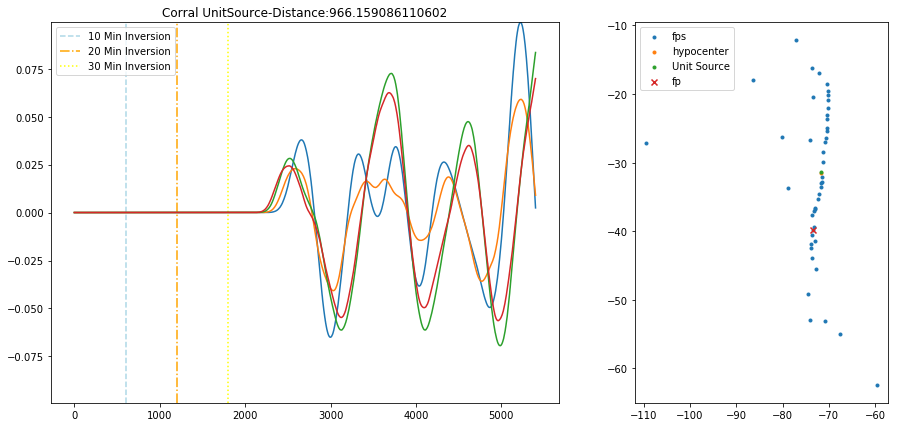

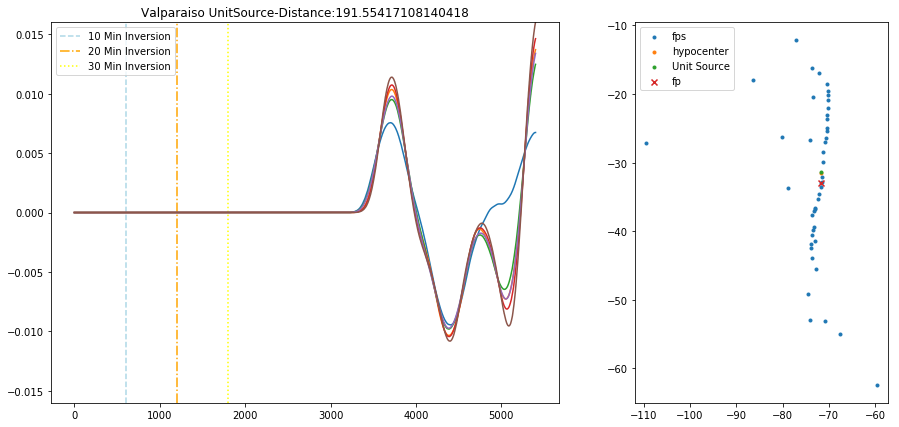

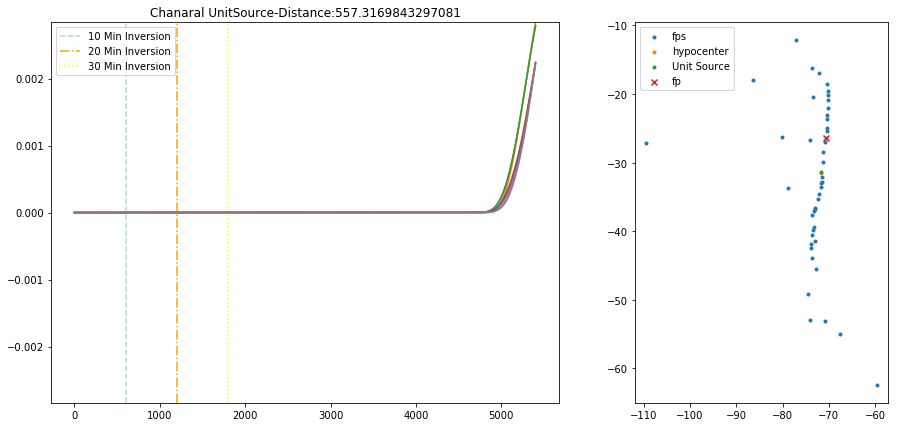

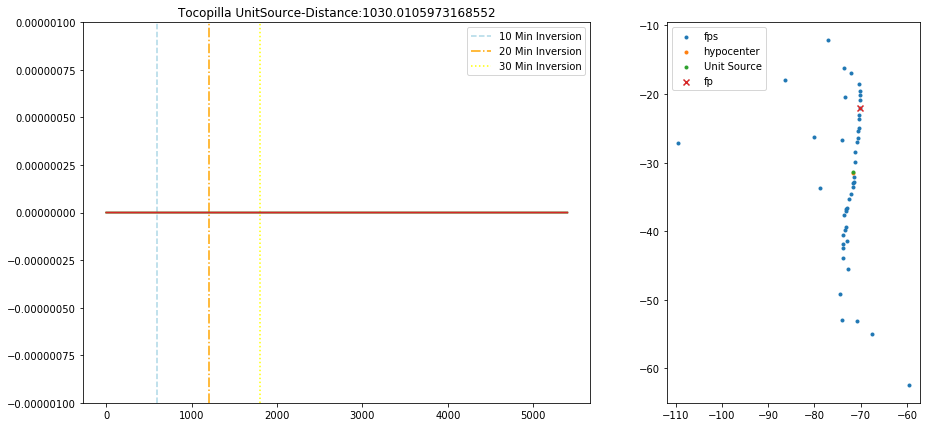

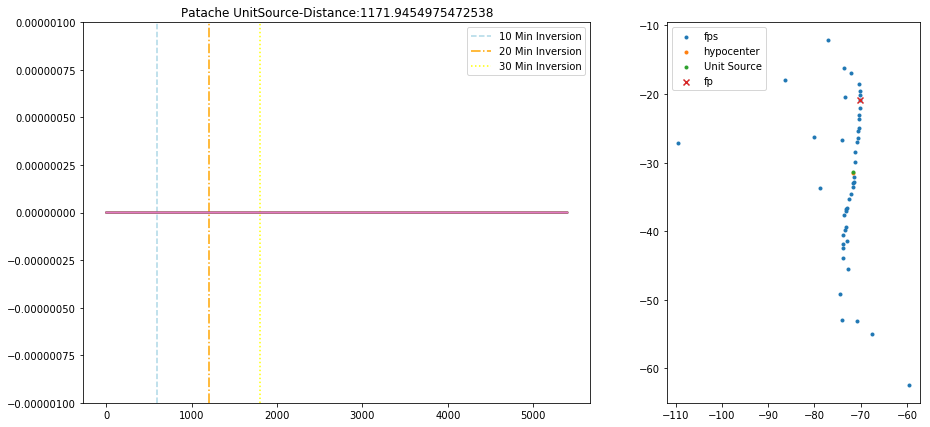

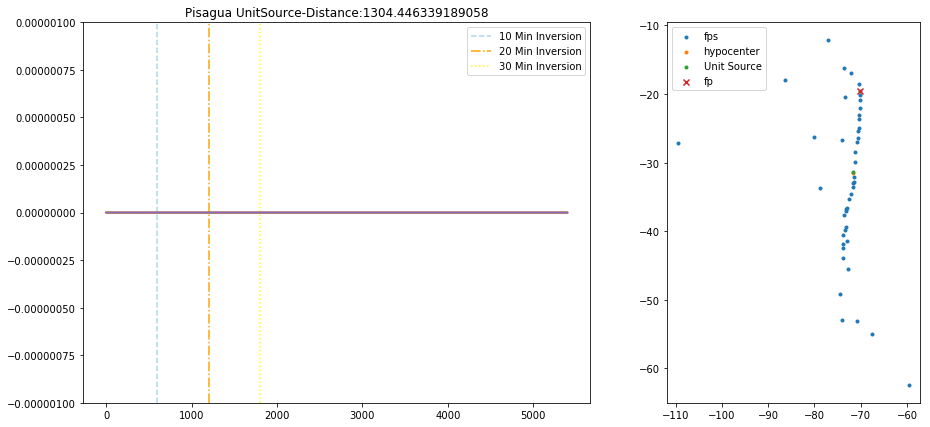

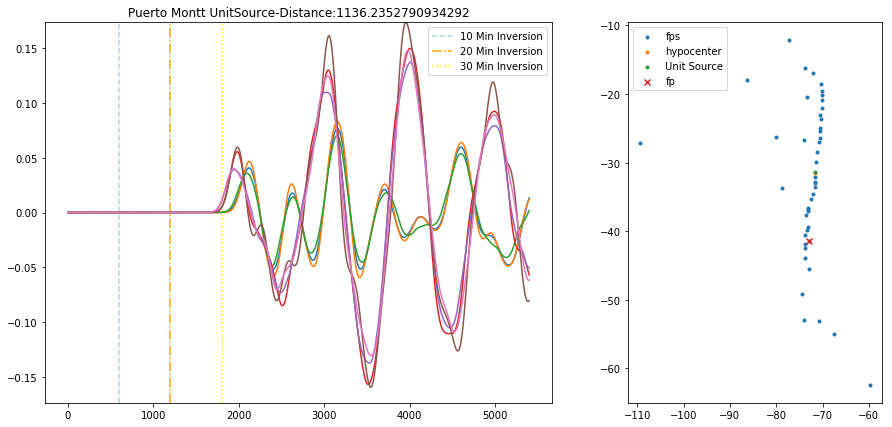

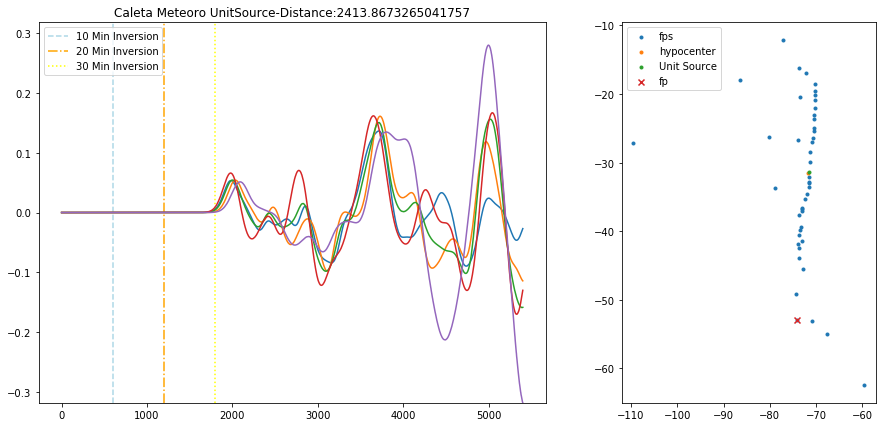

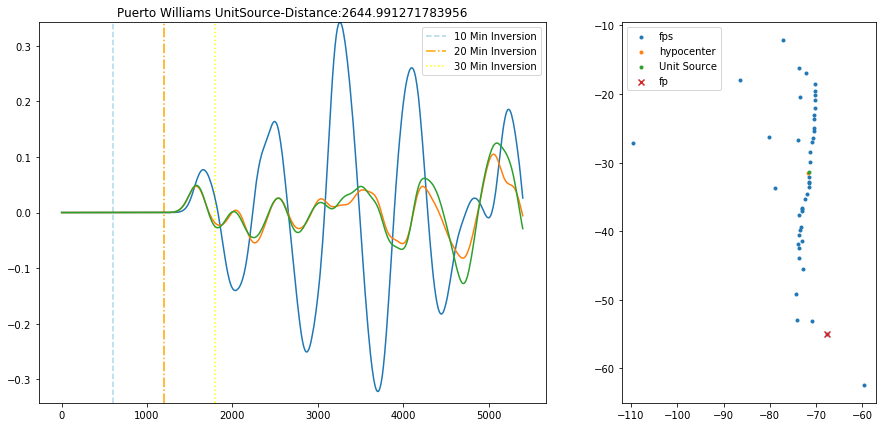

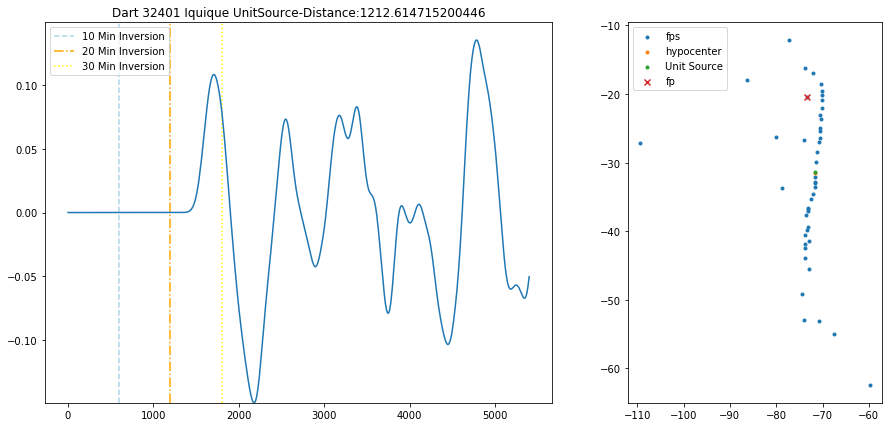

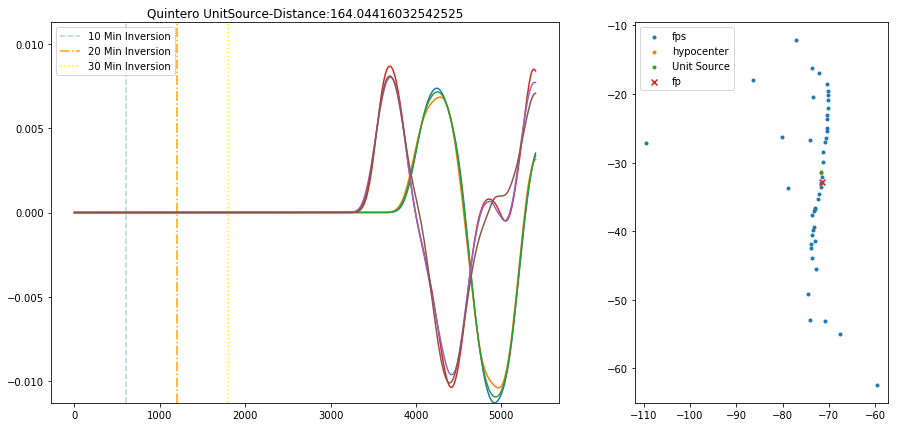

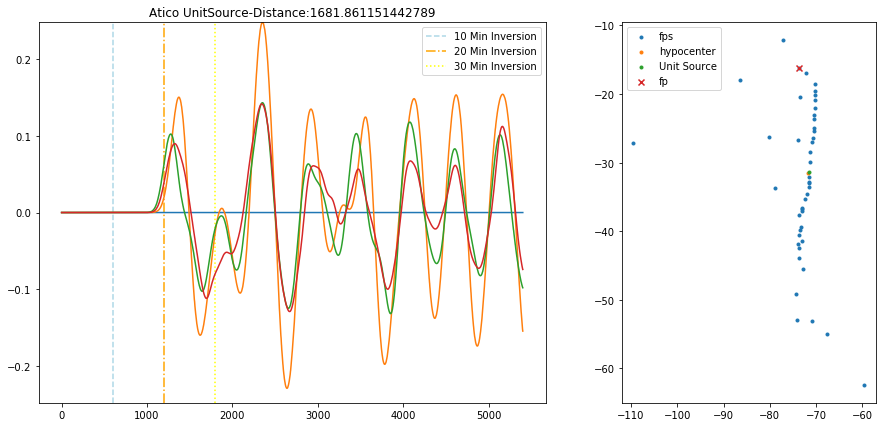

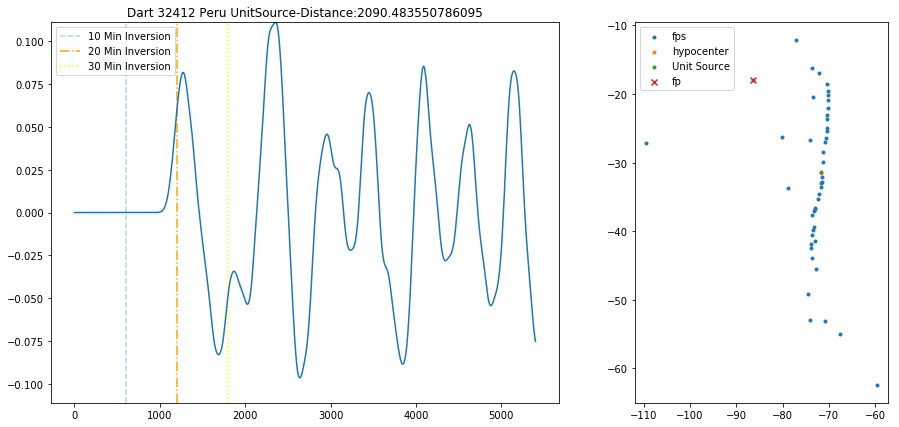

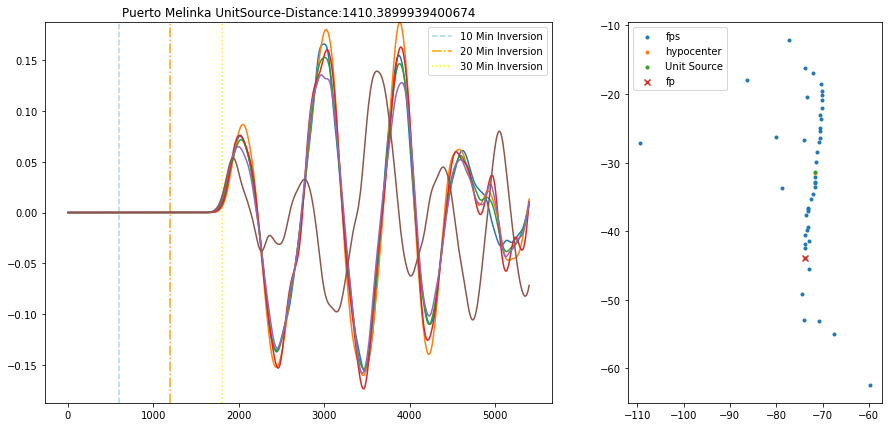

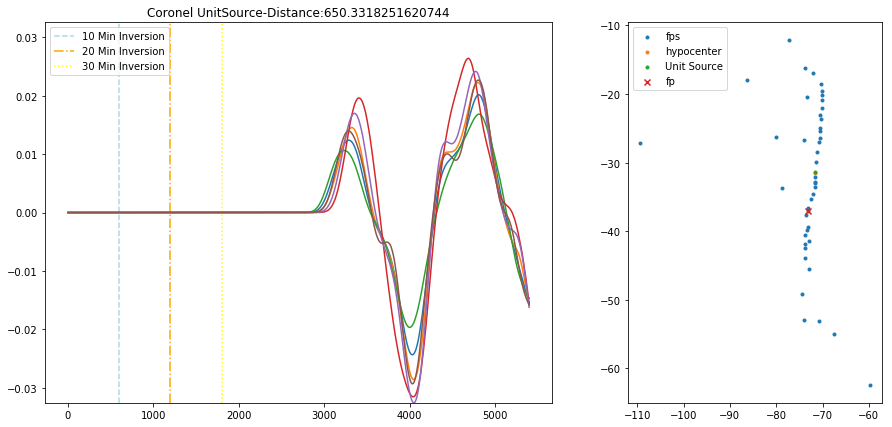

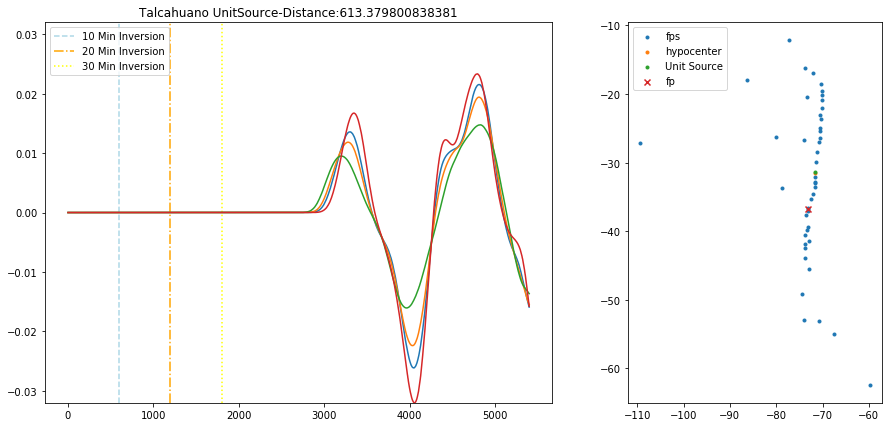

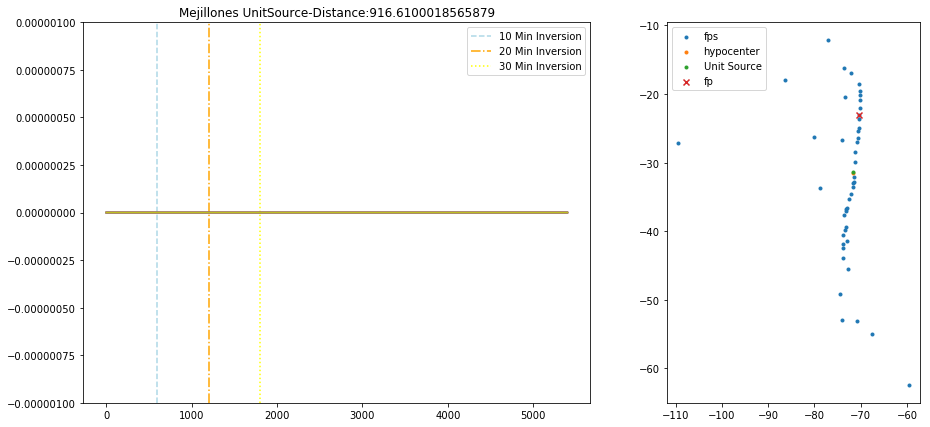

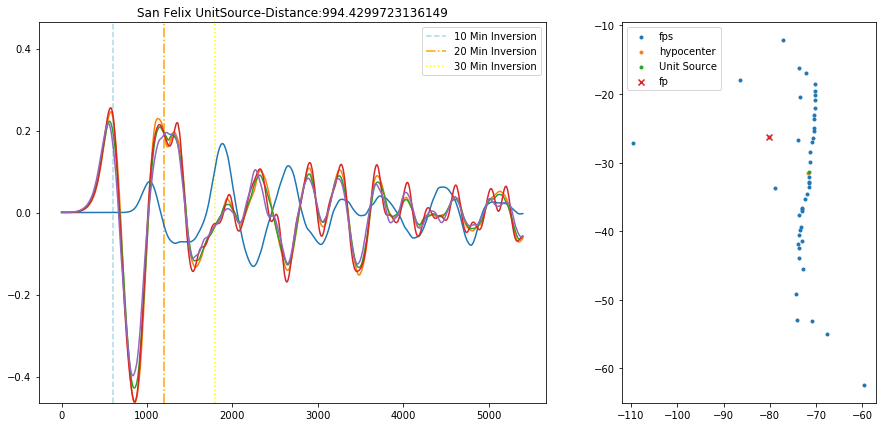

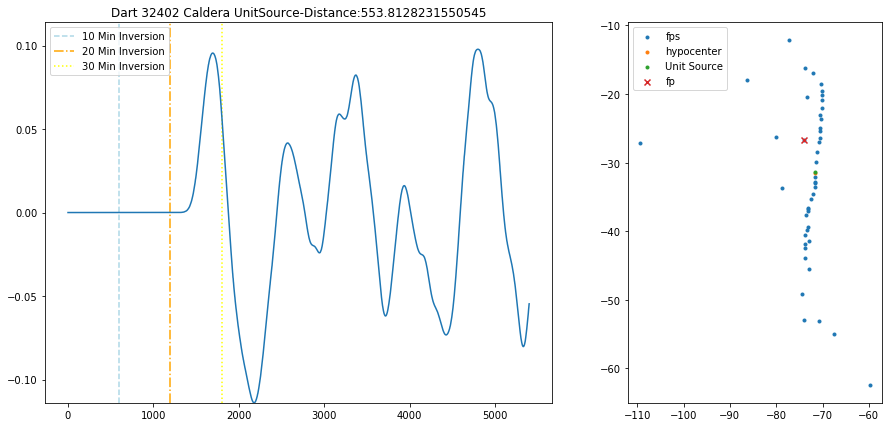

In [ ]:
for file in files:
    df = pd.read_csv(file, index_col=0)
    x = np.arange(5401)
    y = np.zeros((5401,len(df.vfp.unique())))
    map_y = dict([(vfp,i) for (vfp,i) in zip(df.vfp.unique(),np.arange(len(df.vfp.unique())))])
    for i,row in df.iterrows():
        y[int(row.tstep),map_y[row.vfp]] = row.amplitude
    
    
    max_val = np.max(np.abs(y))
    fp = float(os.path.basename(file).split("_")[0])
    
    row = df_fp[df_fp["MAREOGRAFO ID ASOCIADO"] == fp].iloc[0]
    coords = (row["LOCALIDAD LATITUD"],row["LOCALIDAD LONGITUD"])
    dist = geopy.distance.geodesic(scenario, coords).km
    
    
    fig,axes=plt.subplots(1,2, gridspec_kw = {'width_ratios':[2, 1]},figsize=(15,7))
    axes[0].set_title("{} UnitSource-Distance:{}".format(row["LOCALIDAD NOMBRE"],dist))
    axes[0].set_ylim((-(max_val+1e-6),(max_val+1e-6)))
    axes[0].plot(x,y)
    axes[0].vlines(600,ymin=-(max_val+1e-6), ymax=(max_val+1e-6),label="10 Min Inversion",linestyles="dashed",color="lightblue")
    axes[0].vlines(1200,ymin=-(max_val+1e-6), ymax=(max_val+1e-6),label="20 Min Inversion",linestyles="dashdot",color="orange")
    axes[0].vlines(1800,ymin=-(max_val+1e-6), ymax=(max_val+1e-6),label="30 Min Inversion",linestyles="dotted",color="yellow")
    axes[0].legend()
    axes[1].scatter(points.long,points.lat,marker=".",label="fps")
    axes[1].scatter(hypo[1],hypo[0],marker=".",label="hypocenter")
    axes[1].scatter(scenario[1],scenario[0],marker=".",label="Unit Source")
    axes[1].scatter(coords[1],coords[0], marker="x", label="fp")
    axes[1].legend()
    plt.show()